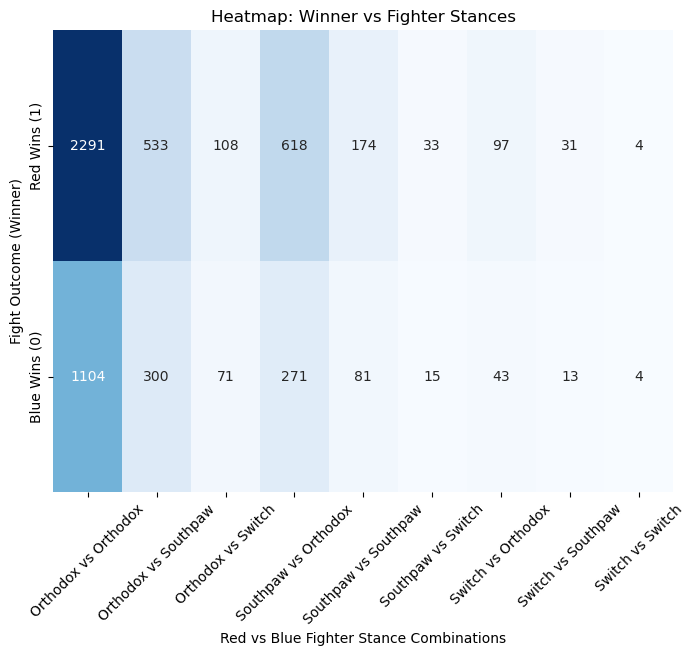

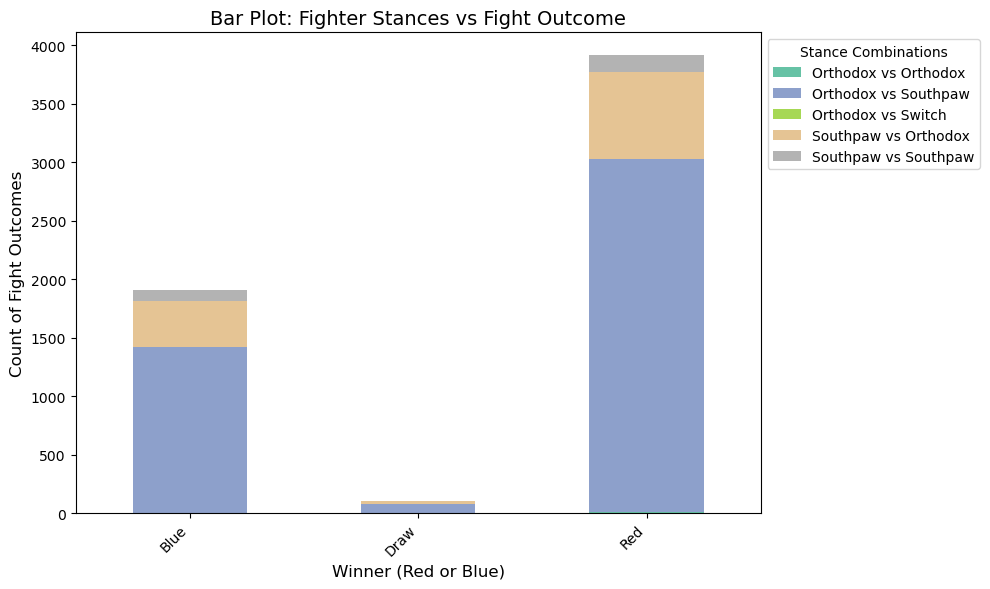

Winner
Red     3979
Blue    1923
Draw     110
Name: count, dtype: int64
Chi-square statistic: 11.742670243709457
P-value: 0.16305986561796762
Degrees of freedom: 8
Expected frequencies:
[[1115.05612157  273.59108962   58.7908824   291.98376792   83.75237437
    15.76515282   45.98169573   14.45139009    2.62752547]
 [2279.94387843  559.40891038  120.2091176   597.01623208  171.24762563
    32.23484718   94.01830427   29.54860991    5.37247453]]
There is no statistically significant correlation between the winner and the stances.


In [29]:
# DETERMINING ANY CORRELATION BETWEEN FIGHTER STANCE AND WINRATE

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the dataset
fight_data = pd.read_csv('fight_data.csv')

# Convert the Winner column to numerical values (Red = 1, Blue = 0)
fight_data['Winner_num'] = fight_data['Winner'].map({'Red': 1, 'Blue': 0})

# Mapping stance categories to numerical values
stance_mapping = {'Orthodox': 0, 'Southpaw': 1, 'Switch': 2}

# Convert the stances to numerical values for both Red and Blue fighters
fight_data['R_stance_num'] = fight_data['R_Stance'].map(stance_mapping)
fight_data['B_stance_num'] = fight_data['B_Stance'].map(stance_mapping)

# Create a contingency table to show the distribution of winner vs stances
contingency_table = pd.crosstab(fight_data['Winner_num'], [fight_data['R_stance_num'], fight_data['B_stance_num']])

# Ensure the rows are in the correct order: 1 for Red wins and 0 for Blue wins
# This will arrange the rows of the contingency table as Red and Blue victories
contingency_table = contingency_table.loc[[1, 0]]  # Rows for Red Wins (1) and Blue Wins (0)

# Visualization: Heatmap of the Contingency Table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Orthodox vs Orthodox', 'Orthodox vs Southpaw', 'Orthodox vs Switch',
                         'Southpaw vs Orthodox', 'Southpaw vs Southpaw', 'Southpaw vs Switch',
                         'Switch vs Orthodox', 'Switch vs Southpaw', 'Switch vs Switch'],
            yticklabels=['Red Wins (1)', 'Blue Wins (0)'])
plt.title('Heatmap: Winner vs Fighter Stances')
plt.xlabel('Red vs Blue Fighter Stance Combinations')
plt.ylabel('Fight Outcome (Winner)')
plt.xticks(rotation=45)
plt.show()

# Ensure we're counting the number of wins (Red or Blue) for each stance combination
stance_counts = fight_data.groupby(['Winner', 'R_Stance', 'B_Stance']).size().unstack(fill_value=0)

# Sum the counts by winner to get total wins for Red and Blue fighters
total_wins_by_winner = stance_counts.groupby('Winner').sum()

# Plot the bar chart for the total counts of Red vs Blue wins
total_wins_by_winner.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Set the title and labels
plt.title('Bar Plot: Fighter Stances vs Fight Outcome', fontsize=14)
plt.xlabel('Winner (Red or Blue)', fontsize=12)
plt.ylabel('Count of Fight Outcomes', fontsize=12)

# Adjust x-tick labels to fit better (rotate and reduce font size)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels and set font size

# Adjust y-tick labels to make them smaller
plt.yticks(fontsize=10)

# Adjust legend: make the font size smaller and the location fit better
plt.legend(title='Stance Combinations', labels=['Orthodox vs Orthodox', 'Orthodox vs Southpaw', 'Orthodox vs Switch',
                                               'Southpaw vs Orthodox', 'Southpaw vs Southpaw', 'Southpaw vs Switch',
                                               'Switch vs Orthodox', 'Switch vs Southpaw', 'Switch vs Switch'], 
           loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))

# Tighten the layout so the labels fit inside the figure
plt.tight_layout()

# Show the plot
plt.show()

# Print the result
print(outcomes_count)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < 0.05:
    print("There is a statistically significant correlation between the winner and the stances.")
else:
    print("There is no statistically significant correlation between the winner and the stances.")

    

#Upon searching for a correlation here I have found the the Red Side in the UFC wins significantly more than the Blue side

       R_fighter          B_fighter        Referee        date  \
0   Adrian Yanez      Gustavo Lopez  Chris Tognoni  2021-03-20   
1   Trevin Giles      Roman Dolidze      Herb Dean  2021-03-20   
2    Tai Tuivasa    Harry Hunsucker      Herb Dean  2021-03-20   
3  Cheyanne Buys  Montserrat Conejo     Mark Smith  2021-03-20   
4  Marion Reneau      Macy Chiasson     Mark Smith  2021-03-20   

                 location Winner  title_bout       weight_class  B_avg_KD  \
0  Las Vegas, Nevada, USA    Red       False       Bantamweight     0.000   
1  Las Vegas, Nevada, USA    Red       False       Middleweight     0.500   
2  Las Vegas, Nevada, USA    Red       False        Heavyweight       NaN   
3  Las Vegas, Nevada, USA   Blue       False   WomenStrawweight       NaN   
4  Las Vegas, Nevada, USA   Blue       False  WomenBantamweight     0.125   

   B_avg_opp_KD  ...  R_win_by_Decision_Unanimous  R_win_by_KO/TKO  \
0           0.0  ...                            0                1   


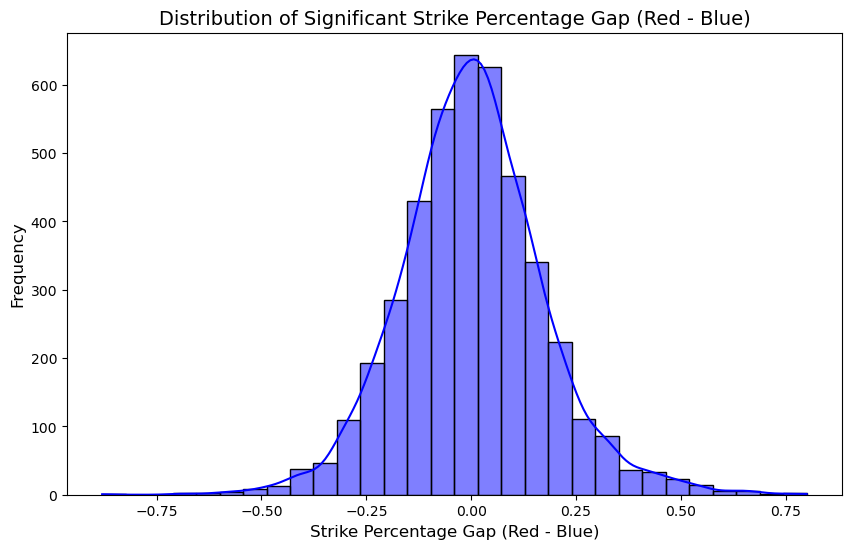

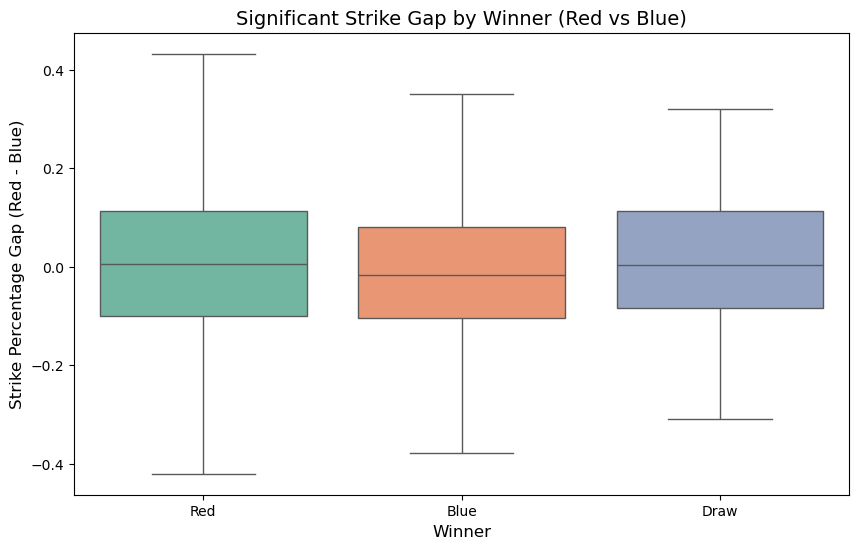

<Figure size 1000x600 with 0 Axes>

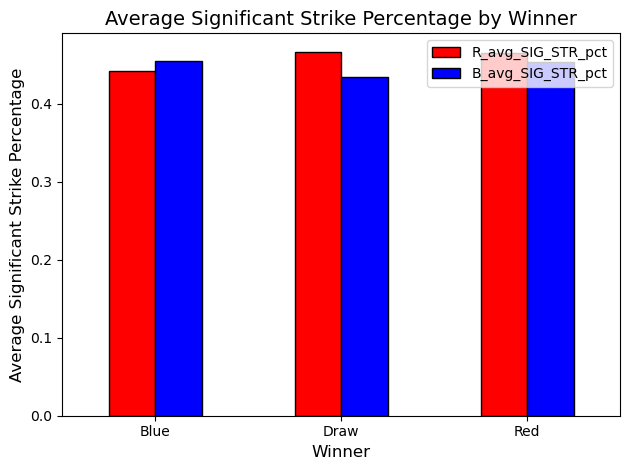

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fight_data.csv')

# Check the first few rows to understand the structure of the data
print(df.head())

# Ensure the relevant columns are present
assert 'Winner' in df.columns, "Winner column is missing"
assert 'B_avg_SIG_STR_pct' in df.columns, "B_avg_SIG_STR_pct column is missing"
assert 'R_avg_SIG_STR_pct' in df.columns, "R_avg_SIG_STR_pct column is missing"

# Calculate average significant strike percentage for red and blue
avg_blue_strikes = df['B_avg_SIG_STR_pct'].mean()
avg_red_strikes = df['R_avg_SIG_STR_pct'].mean()

print(f"Average Blue Fighter SIG_STR_pct: {avg_blue_strikes:.2f}")
print(f"Average Red Fighter SIG_STR_pct: {avg_red_strikes:.2f}")

# Calculate the average gap between Red and Blue fighters
# This is the difference between R_avg_SIG_STR_pct and B_avg_SIG_STR_pct for each fight
df['SIG_STR_gap'] = df['R_avg_SIG_STR_pct'] - df['B_avg_SIG_STR_pct']
avg_gap = df['SIG_STR_gap'].mean()

print(f"Average Gap between Red and Blue Fighters: {avg_gap:.2f}")

# Now calculate the average gap between red and blue for each winner (Red or Blue)
avg_gap_by_winner = df.groupby('Winner')['SIG_STR_gap'].mean()
print("\nAverage Gap by Winner:")
print(avg_gap_by_winner)

# Further breakdown: Calculate average percentage for red and blue by winner
avg_str_by_winner = df.groupby('Winner')[['R_avg_SIG_STR_pct', 'B_avg_SIG_STR_pct']].mean()
print("\nAverage Significant Strike Percentage by Winner:")
print(avg_str_by_winner)

# Optionally: You can also calculate the total number of fights won by Red and Blue
winner_count = df['Winner'].value_counts()
print("\nFight Win Counts:")
print(winner_count)

# Visualization 1: Distribution of the gap between Red and Blue fighters
plt.figure(figsize=(10, 6))
sns.histplot(df['SIG_STR_gap'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Significant Strike Percentage Gap (Red - Blue)', fontsize=14)
plt.xlabel('Strike Percentage Gap (Red - Blue)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualization 2: Boxplot of the significant strike gap by Winner
plt.figure(figsize=(10, 6))
sns.boxplot(x='Winner', y='SIG_STR_gap', data=df, hue='Winner', palette="Set2", showfliers=False)
plt.title('Significant Strike Gap by Winner (Red vs Blue)', fontsize=14)
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Strike Percentage Gap (Red - Blue)', fontsize=12)
plt.show()

# Visualization 3: Bar plot of average significant strike percentages by Winner
avg_str_by_winner = df.groupby('Winner')[['R_avg_SIG_STR_pct', 'B_avg_SIG_STR_pct']].mean()

plt.figure(figsize=(10, 6))
avg_str_by_winner.plot(kind='bar', color=['red', 'blue'], edgecolor='black')
plt.title('Average Significant Strike Percentage by Winner', fontsize=14)
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Average Significant Strike Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

       R_fighter          B_fighter        Referee        date  \
0   Adrian Yanez      Gustavo Lopez  Chris Tognoni  2021-03-20   
1   Trevin Giles      Roman Dolidze      Herb Dean  2021-03-20   
2    Tai Tuivasa    Harry Hunsucker      Herb Dean  2021-03-20   
3  Cheyanne Buys  Montserrat Conejo     Mark Smith  2021-03-20   
4  Marion Reneau      Macy Chiasson     Mark Smith  2021-03-20   

                 location Winner  title_bout       weight_class  B_avg_KD  \
0  Las Vegas, Nevada, USA    Red       False       Bantamweight     0.000   
1  Las Vegas, Nevada, USA    Red       False       Middleweight     0.500   
2  Las Vegas, Nevada, USA    Red       False        Heavyweight       NaN   
3  Las Vegas, Nevada, USA   Blue       False   WomenStrawweight       NaN   
4  Las Vegas, Nevada, USA   Blue       False  WomenBantamweight     0.125   

   B_avg_opp_KD  ...  R_win_by_Decision_Unanimous  R_win_by_KO/TKO  \
0           0.0  ...                            0                1   


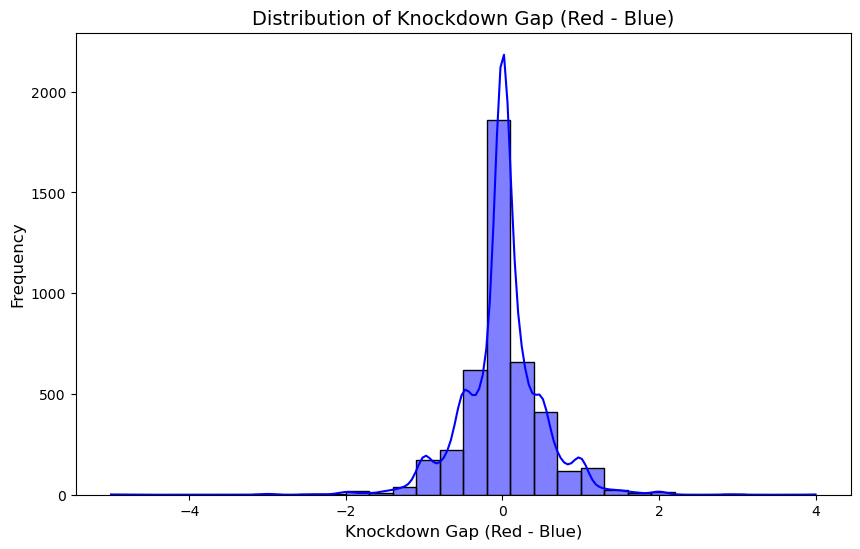

C:\Users\Monkey\AppData\Local\Temp\ipykernel_2832\209230116.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Winner', y='KD_gap', data=df, palette="Set2")


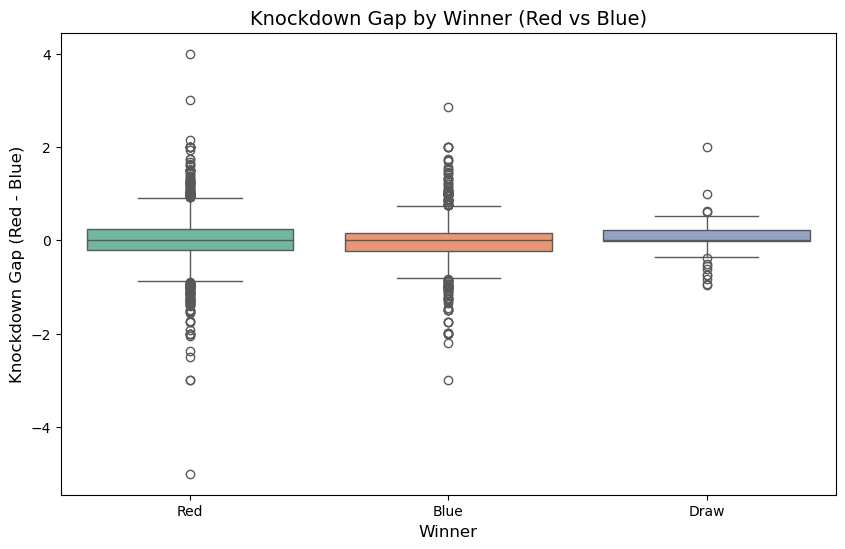

<Figure size 1000x600 with 0 Axes>

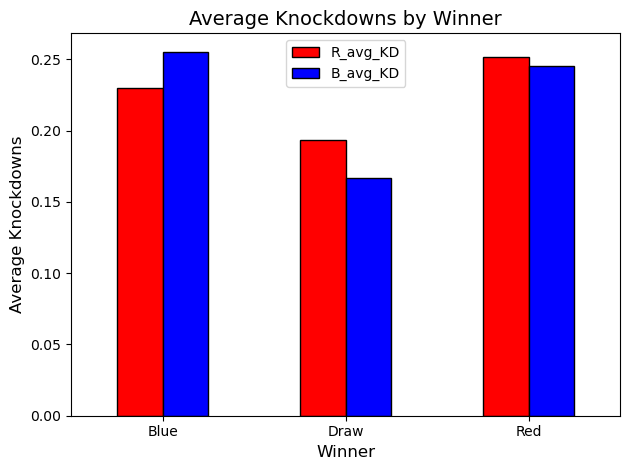

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fight_data.csv')

# Check the first few rows to understand the structure of the data
print(df.head())

# Ensure the relevant columns are present
assert 'Winner' in df.columns, "Winner column is missing"
assert 'B_avg_KD' in df.columns, "B_avg_KD column is missing"
assert 'R_avg_KD' in df.columns, "R_avg_KD column is missing"

# Calculate average knockdown for blue and red
avg_blue_kd = df['B_avg_KD'].mean()
avg_red_kd = df['R_avg_KD'].mean()

print(f"Average Blue Fighter KD: {avg_blue_kd:.2f}")
print(f"Average Red Fighter KD: {avg_red_kd:.2f}")

# Calculate the average gap between Red and Blue fighters
# This is the difference between R_avg_KD and B_avg_KD for each fight
df['KD_gap'] = df['R_avg_KD'] - df['B_avg_KD']
avg_gap = df['KD_gap'].mean()

print(f"Average Gap between Red and Blue Fighters (in Knockdowns): {avg_gap:.2f}")

# Now calculate the average gap between red and blue for each winner (Red or Blue)
avg_gap_by_winner = df.groupby('Winner')['KD_gap'].mean()
print("\nAverage Gap by Winner:")
print(avg_gap_by_winner)

# Further breakdown: Calculate average knockdowns for red and blue by winner
avg_kd_by_winner = df.groupby('Winner')[['R_avg_KD', 'B_avg_KD']].mean()
print("\nAverage Knockdowns by Winner:")
print(avg_kd_by_winner)

# Optionally: You can also calculate the total number of fights won by Red and Blue
winner_count = df['Winner'].value_counts()
print("\nFight Win Counts:")
print(winner_count)

# Visualization 1: Distribution of the KD Gap (Red - Blue)
plt.figure(figsize=(10, 6))
sns.histplot(df['KD_gap'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Knockdown Gap (Red - Blue)', fontsize=14)
plt.xlabel('Knockdown Gap (Red - Blue)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualization 2: Boxplot of KD Gap by Winner
plt.figure(figsize=(10, 6))
sns.boxplot(x='Winner', y='KD_gap', data=df, palette="Set2")
plt.title('Knockdown Gap by Winner (Red vs Blue)', fontsize=14)
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Knockdown Gap (Red - Blue)', fontsize=12)
plt.show()

# Visualization 3: Bar plot of average knockdown percentages by Winner
avg_kd_by_winner = df.groupby('Winner')[['R_avg_KD', 'B_avg_KD']].mean()

plt.figure(figsize=(10, 6))
avg_kd_by_winner.plot(kind='bar', color=['red', 'blue'], edgecolor='black')
plt.title('Average Knockdowns by Winner', fontsize=14)
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Average Knockdowns', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


       R_fighter          B_fighter        Referee        date  \
0   Adrian Yanez      Gustavo Lopez  Chris Tognoni  2021-03-20   
1   Trevin Giles      Roman Dolidze      Herb Dean  2021-03-20   
2    Tai Tuivasa    Harry Hunsucker      Herb Dean  2021-03-20   
3  Cheyanne Buys  Montserrat Conejo     Mark Smith  2021-03-20   
4  Marion Reneau      Macy Chiasson     Mark Smith  2021-03-20   

                 location Winner  title_bout       weight_class  B_avg_KD  \
0  Las Vegas, Nevada, USA    Red       False       Bantamweight     0.000   
1  Las Vegas, Nevada, USA    Red       False       Middleweight     0.500   
2  Las Vegas, Nevada, USA    Red       False        Heavyweight       NaN   
3  Las Vegas, Nevada, USA   Blue       False   WomenStrawweight       NaN   
4  Las Vegas, Nevada, USA   Blue       False  WomenBantamweight     0.125   

   B_avg_opp_KD  ...  R_win_by_Decision_Unanimous  R_win_by_KO/TKO  \
0           0.0  ...                            0                1   


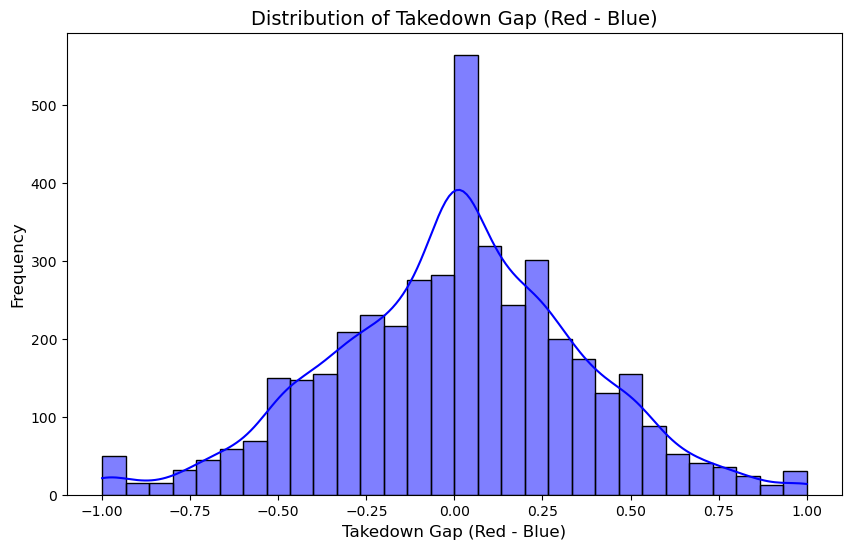

C:\Users\Monkey\AppData\Local\Temp\ipykernel_2832\292303189.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Winner', y='TD_gap', data=df, palette="Set2")


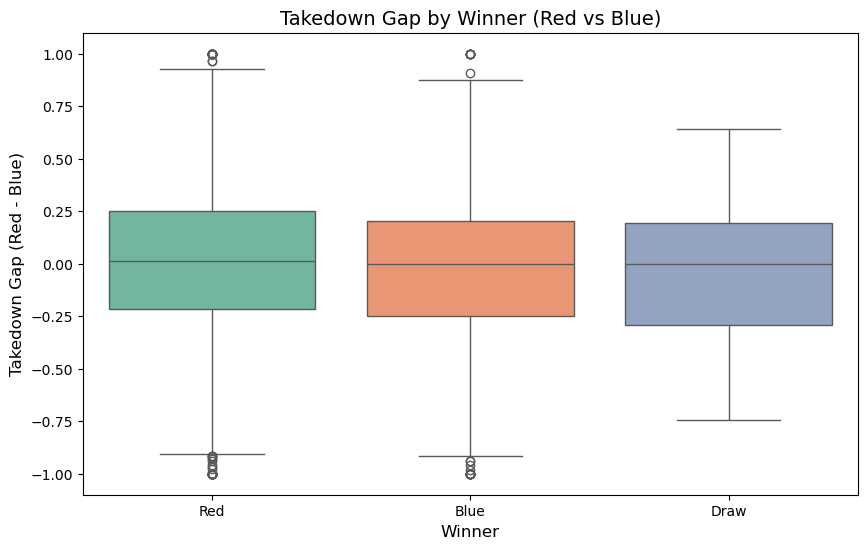

<Figure size 1000x600 with 0 Axes>

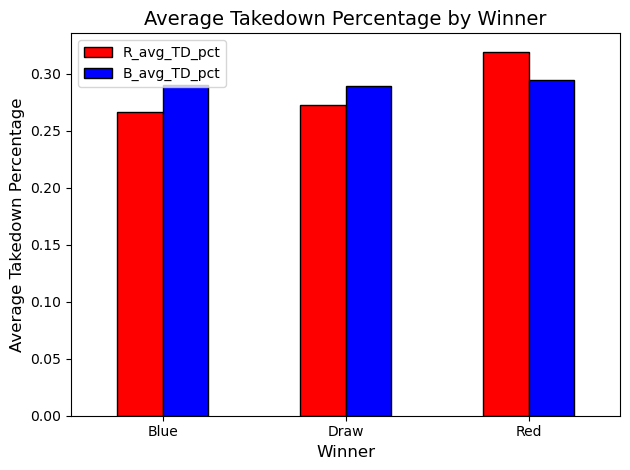

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fight_data.csv')

# Check the first few rows to understand the structure of the data
print(df.head())

# Ensure the relevant columns are present
assert 'Winner' in df.columns, "Winner column is missing"
assert 'B_avg_TD_pct' in df.columns, "B_avg_TD_pct column is missing"
assert 'R_avg_TD_pct' in df.columns, "R_avg_TD_pct column is missing"

# Calculate average takedown percentage for blue and red
avg_blue_td = df['B_avg_TD_pct'].mean()
avg_red_td = df['R_avg_TD_pct'].mean()

print(f"Average Blue Fighter Takedown Percentage: {avg_blue_td:.2f}")
print(f"Average Red Fighter Takedown Percentage: {avg_red_td:.2f}")

# Calculate the average gap between Red and Blue fighters in takedowns
# This is the difference between R_avg_TD_pct and B_avg_TD_pct for each fight
df['TD_gap'] = df['R_avg_TD_pct'] - df['B_avg_TD_pct']
avg_gap = df['TD_gap'].mean()

print(f"Average Gap between Red and Blue Fighters (in Takedowns): {avg_gap:.2f}")

# Now calculate the average gap between red and blue for each winner (Red or Blue)
avg_gap_by_winner = df.groupby('Winner')['TD_gap'].mean()
print("\nAverage Gap by Winner:")
print(avg_gap_by_winner)

# Further breakdown: Calculate average takedown percentage for red and blue by winner
avg_td_by_winner = df.groupby('Winner')[['R_avg_TD_pct', 'B_avg_TD_pct']].mean()
print("\nAverage Takedown Percentage by Winner:")
print(avg_td_by_winner)

# Optionally: You can also calculate the total number of fights won by Red and Blue
winner_count = df['Winner'].value_counts()
print("\nFight Win Counts:")
print(winner_count)

# Visualization 1: Distribution of the TD Gap (Red - Blue)
plt.figure(figsize=(10, 6))
sns.histplot(df['TD_gap'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Takedown Gap (Red - Blue)', fontsize=14)
plt.xlabel('Takedown Gap (Red - Blue)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualization 2: Boxplot of TD Gap by Winner
plt.figure(figsize=(10, 6))
sns.boxplot(x='Winner', y='TD_gap', data=df, palette="Set2")
plt.title('Takedown Gap by Winner (Red vs Blue)', fontsize=14)
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Takedown Gap (Red - Blue)', fontsize=12)
plt.show()

# Visualization 3: Bar plot of average takedown percentages by Winner
avg_td_by_winner = df.groupby('Winner')[['R_avg_TD_pct', 'B_avg_TD_pct']].mean()

plt.figure(figsize=(10, 6))
avg_td_by_winner.plot(kind='bar', color=['red', 'blue'], edgecolor='black')
plt.title('Average Takedown Percentage by Winner', fontsize=14)
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Average Takedown Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Fight Win Counts in Las Vegas, Nevada, USA:
Winner
Red     1102
Blue     433
Draw      30
Name: count, dtype: int64


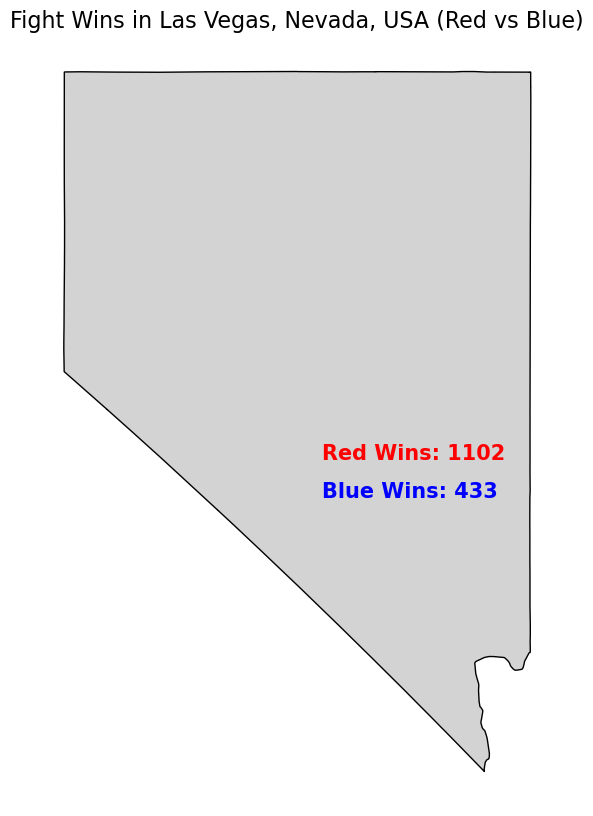

In [49]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fight_data.csv')

# Ensure that 'location' and 'Winner' columns are present
assert 'location' in df.columns, "Location column is missing"
assert 'Winner' in df.columns, "Winner column is missing"

# Filter the data for fights held in 'Las Vegas, Nevada, USA'
las_vegas_fights = df[df['location'] == 'Las Vegas, Nevada, USA']

# Count the number of Red and Blue winners in Las Vegas, Nevada, USA
winner_counts = las_vegas_fights['Winner'].value_counts()

# Print the counts for Red and Blue winners
print("\nFight Win Counts in Las Vegas, Nevada, USA:")
print(winner_counts)

# Load the Nevada state shapefile (you can download this from various online sources or use a GeoJSON)
# For example, you can get a Nevada shapefile from https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_32_20m.zip
# Assuming you have a GeoJSON file for Nevada called 'nevada.geojson'
nevada_gdf = gpd.read_file('nevada.geojson')

# Create a basic map of Nevada
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Nevada map
nevada_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay some information: Add labels or shapes based on winner counts
# For simplicity, let's add the winner counts as a text annotation on the map

# Position annotations for Red and Blue winners
ax.text(0.55, 0.45, f"Red Wins: {winner_counts.get('Red', 0)}", fontsize=15, color='red', weight='bold', transform=ax.transAxes)
ax.text(0.55, 0.40, f"Blue Wins: {winner_counts.get('Blue', 0)}", fontsize=15, color='blue', weight='bold', transform=ax.transAxes)

# Add title and labels
plt.title('Fight Wins in Las Vegas, Nevada, USA (Red vs Blue)', fontsize=16)
plt.axis('off')  # Turn off axis

# Show the plot
plt.show()


In [45]:
!pip install geopandas matplotlib
